In [3]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestRegressor
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score

df = pd.read_csv('data.csv')
df.head()


,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


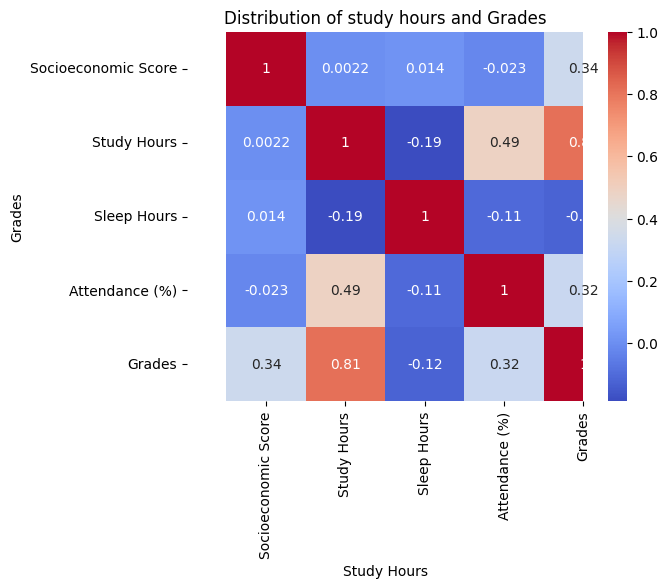

In [4]:
# Data exploration
df.describe()
df.corr( )
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('variable correlation')
plt.Text(0.5, 1.0, 'variable correlation')
sns.boxplot(x='Study Hours', y='Grades', data=df)
plt.title('Distribution of study hours and Grades')
plt.show()


In [5]:
# Making the model
df.head()
X = df[['Study Hours','Attendance (%)','Socioeconomic Score','Sleep Hours']]
y = df['Grades']


In [6]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
y_train


978     34.0
289     35.0
1158    34.0
802     34.0
1133    42.0
        ... 
1095    63.0
1130    33.0
1294    41.0
860     34.0
1126    33.0
Name: Grades, Length: 1110, dtype: float64

In [7]:
# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [8]:
# Model predictions
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error:{mse}")
print(f"R2 score:{r2}")


Mean Squared Error:1.4673514388489208
R2 score:0.9805597707892196
